## Регулярные выражения
***

Регулярные выражения - очень полезный инструмент при работе с текстом. По своей сути регулярные выражения являются строками, выступающими в роли шаблонов для распознавания и/или извлечения фрагментов текста. В языке Python регулярные выражения реализованы в модуле re.


In [ ]:
import re # импорт модуля регулярных выражений

# наиболее популярные методы в данном модуле
# Каждый метод будет более подробно рассмотрен ниже
re.compile('регулярное выражение') # компилирование регулярного выражения. Упрощает переиспользование регулярного выражения, а также улучшает произовдительность скрипта
re.search(regexp, string) # поиск по заданному шаблону
re.match(regexp, string) # поиск по заданному шаблону с первого символа строки
re.findall(regexp, string) # возвращает все совпадения с шаблоном в виде списка
re.split(regexp, string) # использует заданный шаблон в качестве разделителя строки
re.sub(regexp, sub, string) # поиск подстроки по заданному шаблону с последующей её заменой
re.finditer(regexp, string) # возвращает итерируемый объект с объектами Match для всех неперекрывающихся совпадений
                            # Результат можно передать в цикл for и "перебрать"

In [2]:
import re # импорт модуля регулярных выражений

line = input('Введите строку: ') # запрос на ввод строки
regexp = re.compile('a') # получение откомпилированного регулярного выражения
result = regexp.search(line)
print(type(result))

Введите строку: ssdsd
<class 'NoneType'>


Стоит отметить, что компиляция не является необходимым этапом. Однако скомпилированные регулярные
выражения могут заметно ускорить выполнение программы, особенно при обработке больших текстов.
В приведённом выше примере для проверки вхождения подстроки в строку был использован метод search. Метод search возвращает None, если совпадение регулярного выражения не найдено (может интерпретироваться интерпретатором как False). Если совпадение было найдено, то метод вернет специальный объект типа Match, содержащий дополнительную информацию о совпадении.

In [36]:
import re # импорт модуля регулярных выражений

line = 'bbbaaavvv' # запрос на ввод строки
regexp = re.compile('aaa') # получение откомпилированного регулярного выражения
re.search('aaa', line)
result = regexp.search(line)
print(type(result))
print('start:', result.start())
print('end:', result.end())

<class 're.Match'>
start: 3
end: 6


Объект Match в логическом контексте будет интерпретирован как True. Таким образом, метод search можно использовать для проверки условия вхождения подстроки в строку:

In [4]:
import re # импорт модуля регулярных выражений

line = input('Введите строку: ') # запрос на ввод строки
regexp = re.compile('альпака') # получение откомпилированного регулярного выражения
print(type(regexp))
if regexp.search(line):
    print('альпака обнаружена!')
else:
    print('альпак тут точно нет!')

Введите строку: asd
<class 're.Pattern'>
альпак тут точно нет!


В данном случае может возникнуть вопрос: зачем нужны регулярные выражения, если можно просто воспользоваться оператором **in**?

In [3]:
line = input('Введите строку: ') # запрос на ввод строки
if 'альпака' in line:
    print('альпака обнаружена!')
else:
    print('альпак тут точно нет!')

Введите строку: альпальпакапака
альпака обнаружена!


#### Использование специальных символов в регулярных выражения

Главной особенностью регулярных выражений, что для их создания кроме обычных символов используются и специальные метасимволы, позволяющие обобщённо описывать фрагменты интересующей нас подстроки. Например, приведённый выше скрипт игнорирует написание слова с заглавной буквы, а также возможные варианты окончаний.

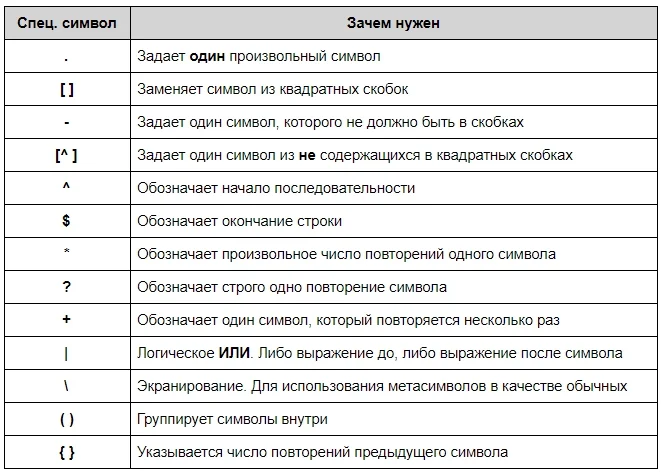

Попробуем учесть в нашем регулярном выражении использование заглавной буквы. Для этого воспользуемся специальным символом **|** ("или"):

In [7]:
import re # импорт модуля регулярных выражений

regexp = re.compile('альпака|Альпака') # альпака или Альпака
line = input('Введите строку: ') # запрос на ввод строки
if regexp.search(line):
    print('альпака обнаружена!')
else
    print('альпак тут точно нет!')

Однако при таком виде записи нам придётся перечислять все возможные варианты написания слова через специальный символ | . Чтобы избежать этого и описать возможные изменения только в первой букве, можно воспользоваться специальными символами для группировки - **круглыми скобками**:

In [8]:
import re # импорт модуля регулярных выражений

regexp = re.compile('(а|A)льпака') # метасимвол | "выбирает" только между а и А
line = input('Введите строку: ') # запрос на ввод строки
if regexp.search(line):
    print('альпака обнаружена!')
else
    print('альпак тут точно нет!')

Полученное регулярное выражение совпадает с буквой а или А, за которой следует 'льпака'. Другой способ записи данного регулярного выражения выглядит так:

In [ ]:
import re # импорт модуля регулярных выражений

regexp = re.compile('[аА]льпака')
line = input('Введите строку: ') # запрос на ввод строки
if regexp.search(line):
    print('альпака обнаружена!')
else
    print('альпак тут точно нет!')

В данном случае при поиске совпадения перебираются все символы заключённые между [ и ]. Чтобы уберечь нас от перечисления всех интересующих нас символов, существуют сокращённые виды записи для часто используемых диапозонов символов. Например, запись **[a-z]** - включает в себя все строчные латинские буквы, а **[0-9]** - все цифры. Подобные виды записей можно комбинировать друг с другом. Таким образом набор **[0-9A-Z]** помимо всех цифр будет также включать все заглавные латинские буквы. Стоит отметить, что для включения знака дефиса в данный набор, его необходимо поместить на первое место: **[-0-9]**.


In [10]:
import re # импорт модуля регулярных выражений

regexp = re.compile('[0-9]')
line = input('Введите строку: ') # запрос на ввод строки
if regexp.search(line):
    print('Цифра! Я нашёл её, что дальше?')
else:
    print('Ничего интересного тут нет!')

KeyboardInterrupt: Interrupted by user

Также можно исключить набор символов из шаблона. Для этого необходимо внутри квадратных скобок использовать специальный символ ^. При этом данный символ имеет смысл только если стоит перед остальными символами внутри [ ]. Т. е. [^0] соответствует всем символам кроме '0', а [0^] == либо 0, либо ^. Также не стоит путать данный метасимвол с сиволом начала строки ^, использующийся вне квадратных скобок.

In [19]:
import re # импорт модуля регулярных выражений

regexp = re.compile('[^3]')
line = input('Введите строку: ') # запрос на ввод строки
if regexp.search(line):
    print('')
else:
    print('')

Введите строку: asd123
В строке нет ни одной цифры!


| Метасимвол | Значение | Метасимвол | Значение |
|------|---------------------|---------------------|---------------------|
|**.** | любой символ|||
|**\w** | Любая цифра или буква **[a-zA-Z0-9_]** | **\W** | все, кроме буквы или цифры **[^a-zA-Z0-9_]**|
|**\d** | Любая цифра **[0-9]** | **\D** | все, кроме цифры **[^0-9]**|
|**\s** | Любой пробельный символ **[ \t\n\r\f\v]** | **\S** | любой непробельный символ **[^ \t\n\r\f\v]**|
|**\b** | Начало или конец слова (граница слова - любой пробельный символ или не буквеноцифренный символ)|||

Таким образом, если мы хотим, например, шаблон для описания телефонного номера будет выглядеть следующим образом:

In [12]:
import re # импорт модуля регулярных выражений

line = input('Введите номер телефона: ') # запрос на ввод строки
regexp = re.compile('\d-\d\d\d-\d\d\d-\d\d-\d\d')
if regexp.search(line):
    print('Спасибо! Мы Вам перезвоним!')
else:
    print('Это совсем не похоже на телефонный номер!')

Введите номер телефона: 89137346624
Это совсем не похоже на телефонный номер!


Однако данная запись выглядит довольно перегруженной. Что если нам необходимо было задать последовательность цифр длиной в 100 символов? Для того чтобы задать число повторений символа или группы символов существует два способа: 
* с использованием фигурных скобок **\{** и **\}**. Число, заключённое в фигурные скобки указывает на количество повторений. При помощи этого метода можно также задать некоторый интервал. Левая и правая граница желаемого интервала разделяется запятой. **[a-z]{0,2}** - последовательность символов, состоящая из любых строчных латинских букв, длиной от 0 до 2 (включительно); Также можно задавать открытые интервалы. Например, **{5,}** - соответствует полседовательности символов длиной больше 5.
* при помощи специальных символов: 
    * **?** — 0 или 1 вхождение шаблона слева
    * **\*** — 0 и более вхождений шаблона слева
    * **\+** — 1 и более вхождений шаблона слева
Используя фигурные скобки шаблон для описания телефонного номера будет выглядеть так:

Попробуйте догадаться, какой шаблон закодирован в данном примере:

In [80]:
regexp = re.compile('[a-zA-Z0-9_.-]+@[-a-zA-Z0-9]+\.[-a-zA-Z0-9]+')

Поскольку список специальных символов для составления регулярных выражений довольно большой, может возникнуть необходимость использования зарезервированных символов без их специальных свойств (+ как плюс). Для этого необходимо *экранировать* данный метасимвол при помощи символа **\\**. Таким образом **\\+** == плюс, а **\\?** == вопрос. В данном случае, в шаблоне, описывающем телефонный номер предполагается наличие символа + перед когод страны:

In [ ]:
regexp = re.compile('\+\d{1}-\d{3}-\d{3}-\d{2}-\d{2}')

Рассмотрим следующий пример. Вам дана строка, содержащая фамилию и дату рождения, разделённые табуляцией (**\t**). Попробуем предложить регулярное выражение, описывающее эту строку:

In [33]:
line = 'Ivanov\t12.05.1992'
print(line)

regexp = re.compile('^[A-Za-z]+\t[0-9]{1,2}\.\d{2}\.([0-9]{2}|[0-9]{4})$')

if regexp.search(line):
    print('Строка соответствует шаблону')
else:
    print('Увы, строка не соответствует шаблону')

Ivanov	12.05.1992
Строка соответствует шаблону


In [15]:
line = '_\\new_'
print(line)

print(re.compile('_\new_').search(line))
print('String in regexp:', '_\new_')

_\new_
None
String in regexp: _
ew_


В случае, рассмотренном выше, мы не учли, что **\n** - символ новой строки, поэтому его необходимо экранировать при помощи символа **\\**. Теперь как и исследуемая строка, так и регулярное выражение имеют один и тот же вид. Проверим наличие совпадения:

In [17]:
line = '_\\new_'
print(line)

print(re.compile('_\\new_').search(line))
print('String in regexp:', '_\\new_')

_\new_
None
String in regexp: _\new_


В данном случае при интерпретации строки в регулярном выражении сперва происходит замена **\\\\** на **\\** (**'_\\new_'** -> **'_\new_'**), а затем данная строка используется в качестве шаблона. Таким образом происходит проверка на совпадение с символом новой строки. Похожая ситуация наблюдается при передачи строки вида **'_\\\new_'**. Сперва **\\\\** заменается интерпретатором на **\\**, а затем вместо **\n** подставляется новая строка:

In [78]:
print(re.compile('_\\\new_').search(line))
print('String in regexp:', '_\\\new_')

None
String in regexp: _\
ew_


Таким образом для получения правильного шаблона необходимо сперва экранировать символ **\\**, а затем экранировать **\n**:

In [79]:
print(re.compile('_\\\\new_').search(line))
print('String in regexp:', '_\\\\new_')

<re.Match object; span=(0, 6), match='_\\new_'>
String in regexp: _\\new_


Для упрощения составления регулярных выражений и экранирования специальных символов обычно используют *необработанные строки*.

#### Необработанные строки

Необработанные строки внешне ничем не отличаются от обычных строк кроме символа **r**, предшествующего начальной кавычке. Синтаксис необработанных строк сообщает интерпретатору о том, что обрабатывать специальные символы в данной строке не нужно. Таким образом все двухсимвольные метасимволы (\n, \t, \r и др.) интерпретируются как двухсимвольные последовательности, начинающиеся с символа обратной косой черты.

In [5]:
print(re.compile(r'_\\new_').search(line))
print('String in regexp:', r'_\\new_')

<re.Match object; span=(0, 6), match='_\\new_'>
String in regexp: _\\new_


Стоит отметить, что необработанные строки - это лишь один из способов определения строк, и по своей сути они являются обычными строками:

In [83]:
'Ivanov\\t12.05.1991' == r'Ivanov\t12.05.1991'

True

Воизбежание ошибок, при составлении регулярных выражений лучше всегда использовать необработанные строки.

#### Использование регулярных выражений для извлечения информации

Во всех примерах выше мы только проверяли наличие необходимой информации в тексте. Однако в подавляющем большинстве случаев регулярные выражения используются для извлечения информации из текста по заданному шаблону. Например, вы читаете статью и хотите получить список всех экспериментов, на которые ссылаются авторы. Допустим в данной статье авторы ссылаются на серии экспериментов в базе данных GEO NCBI. Идентификаторы серий экспериментов в данной базе имеют следующий вид: префикс 'GSE' + последовательность цифр. Таким образом регулярное выражение, описывающее данный идентификатор будет выглядеть следующим образом:

In [ ]:
gse_regexp = re.compile(r'GSE[0-9]+')

Для того, чтобы получить список всех подстрок, удовлетворяющих заданному регулярному выражению, можно воспользоваться методом gse_regexp.findall()

In [18]:
gse_regexp = re.compile(r'GSE[0-9]+')
with open('../files_and_images/paper.html') as paper:
    total = paper.read()
    print(gse_regexp.findall(total))

['GSE17308', 'GSE17308', 'GSE17308', 'GSE17308', 'GSE26712', 'GSE26712', 'GSE26712', 'GSE26712', 'GSE40595', 'GSE40595', 'GSE40595', 'GSE40595', 'GSE66957', 'GSE66957', 'GSE66957', 'GSE66957', 'GSE18520', 'GSE18520', 'GSE18520', 'GSE18520', 'GSE27651', 'GSE27651', 'GSE27651', 'GSE27651', 'GSE6008', 'GSE6008', 'GSE6008', 'GSE6008', 'GSE38666', 'GSE38666', 'GSE38666', 'GSE38666', 'GSE17308', 'GSE17308', 'GSE17308', 'GSE17308', 'GSE14407', 'GSE14407', 'GSE14407', 'GSE14407', 'GSE14001', 'GSE14001', 'GSE14001', 'GSE14001', 'GSE29220', 'GSE29220', 'GSE29220', 'GSE29220', 'GSE29450', 'GSE29450', 'GSE29450', 'GSE29450', 'GSE52037', 'GSE52037', 'GSE52037', 'GSE52037', 'GSE36668', 'GSE36668', 'GSE36668', 'GSE36668', 'GSE23391', 'GSE23391', 'GSE23391', 'GSE23391', 'GSE26712', 'GSE26712', 'GSE26712', 'GSE26712', 'GSE40595', 'GSE40595', 'GSE40595', 'GSE40595', 'GSE66957', 'GSE66957', 'GSE66957', 'GSE66957', 'GSE18520', 'GSE18520', 'GSE18520', 'GSE18520', 'GSE27651', 'GSE27651', 'GSE27651', 'GSE276

In [19]:
gse_regexp = re.compile(r'GSE[0-9]+')
with open('../files_and_images/paper.html') as paper:
    total = paper.read()
    print(set(gse_regexp.findall(total)))

{'GSE18520', 'GSE14407', 'GSE14001', 'GSE40595', 'GSE52037', 'GSE6008', 'GSE17308', 'GSE36668', 'GSE26712', 'GSE38666', 'GSE29450', 'GSE27651', 'GSE15578', 'GSE66957', 'GSE29220', 'GSE23391'}


#### Группировка подшаблонов

Для упрощения извлечения информации при описании шаблона его можно разбивать на отдельные подшаблоны, или группы. Например, нам необходимо описать строку вида: "имя_хромосомы"\t"старт"\t"конец"\t"цепь_днк".

In [20]:
line = 'chr1\t123\t300\t+'
print(line)
regexp = re.compile(r'^chr([0-9]+|[XYM]{1})\t\d+\t[0-9]+\t[-+]{1}$')

chr1	123	300	+


 Для группировки подшаблонов необходимо использовать круглые скобки. Затем каждому подшаблону необходимо присвоить уникальное имя при помощи специальной последовательности **?P<имя>**. Для обращения к найденному по подшаблону совпадению необходимо использовать метод **group()**:

In [39]:
line = 'chr1\t123\t300\t+'
regexp = re.compile(r'(?P<chr>chr([0-9]+|[XYM]{1}))\t(?P<start>[0-9]+)\t(?P<end>[0-9]+)\t(?P<strand>[-+]{1})')
result = regexp.search(line)
print(result.group('strand'))
print(result.group('start'))
print(result.group('chr'))

print(result.group('chr'), 
      result.group('start'), 
      result.group('strand'), sep = '\t')

+
123
chr1
chr1	123	+


#### Использование регулярных выражений для модификации текста

Помимо извлечения информации регулярные выражения могут быть использованы для поиска подстрок совпадающих с заданным шаблоном с последующей их модификацией (удалением подстроки или заменой её на другую строку). Для решения данной задачи может быть использован метод **sub**. Например, рассмотрим довольно частую ситуацию, когда по ошибке вместо одного пробела было исопльзовано несколько. Сперва необходимо создать регулярное выражение, описывающее последовательность пробелов произвольной длины > 1, а затем заменить их на один пробел.

In [87]:
line = 'Ivanov  23.01.1976' 
regexp = re.compile(r' {2,}') # последовательность из пробелов произвольной длины больше 1
line_mod = regexp.sub(' ', line) # поиск подстрок в строке (line) по шаблону (regexp) и замена их на другую подстроку (' ')
print(line_mod)

Ivanov 23.01.1976


Рассмотрим другую довольно частую ситуацию: вместо табуляции в обрабатываемом файле стоят последовательности пробелов. Сперва необходимо создать регулярное выражение, описывающее последовательность пробелов произвольной длины, а затем заменить их на **\t**. Таким образом строка будет преобразована в tab delimeted формат, или tab separated values (TSV).

In [86]:
line = 'Ivanov    23.01.1976' 
regexp = re.compile(r' +') # последовательность из пробелов произвольной длины (но больше 0)
line_mod = regexp.sub('\t', line)
print(line_mod)

Ivanov	23.01.1976
